In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd

# Load dataset
file_path = "AB_NYC_2019.csv"
df = pd.read_csv(file_path)

# Display basic information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Fill missing values (example: fill missing reviews_per_month with 0)
df["reviews_per_month"].fillna(0, inplace=True)

# Drop rows with missing values in 'host_name' if necessary
df.dropna(subset=["host_name"], inplace=True)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [6]:
# Check for duplicates
print(f"Duplicate Rows: {df.duplicated().sum()}")

# Remove duplicates
df.drop_duplicates(inplace=True)

Duplicate Rows: 0


In [7]:
# Standardizing text columns
df["neighbourhood_group"] = df["neighbourhood_group"].str.strip().str.title()
df["room_type"] = df["room_type"].str.lower()

In [16]:
import numpy as np

# Define threshold for removing outliers
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove outliers
df = df[(df["price"] >= lower_bound) & (df["price"] <= upper_bound)]

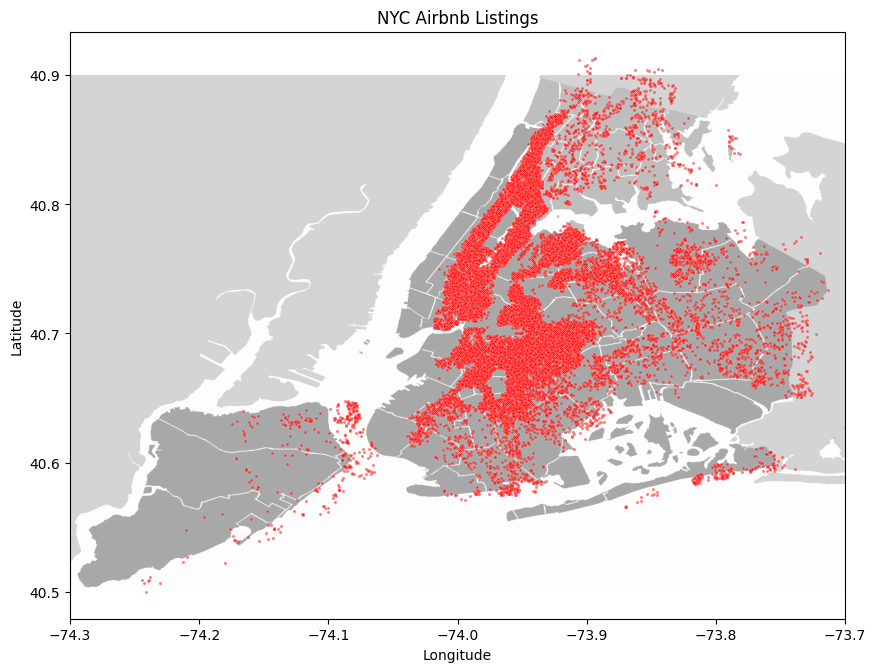

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np

# Load image using PIL
img = Image.open("New_York_City_.png")
nyc_map = np.array(img)  # Convert to NumPy array

# Plot listings on NYC map
plt.figure(figsize=(10, 8))
plt.imshow(nyc_map, extent=[-74.3, -73.7, 40.5, 40.9], alpha=0.6)  # Adjust coordinates if needed

sns.scatterplot(x=df["longitude"], y=df["latitude"], alpha=0.5, color="red", s=5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("NYC Airbnb Listings")
plt.show()